# Projet ADEME ‚Äì Projet ADEME ‚Äì Optimisation des tourn√©es de livraison (CVRPTW)
### Livrable 1 : Mod√©lisation formelle


<p style="color: violet; text-align: center; font-weight: bold; font-size: 18px;">
Louzazna Rayane &nbsp;/&nbsp; Adjout Mourad &nbsp;/&nbsp; Benghali Nada &nbsp;/&nbsp; Niati Mohamed
</p>


Ce livrable pr√©sente la mod√©lisation formelle du probl√®me TSP (Traveling Salesman Problem) dans le cadre du projet ADEME sur la mobilit√© durable.
L‚Äôobjectif est d‚Äôoptimiser les tourn√©es de livraison en minimisant la distance totale parcourue tout en respectant les contraintes de capacit√© des v√©hicules et de fen√™tres temporelles des clients.
Une formalisation math√©matique compl√®te, une analyse de complexit√© et des illustrations de r√©duction de complexit√© sont propos√©es.

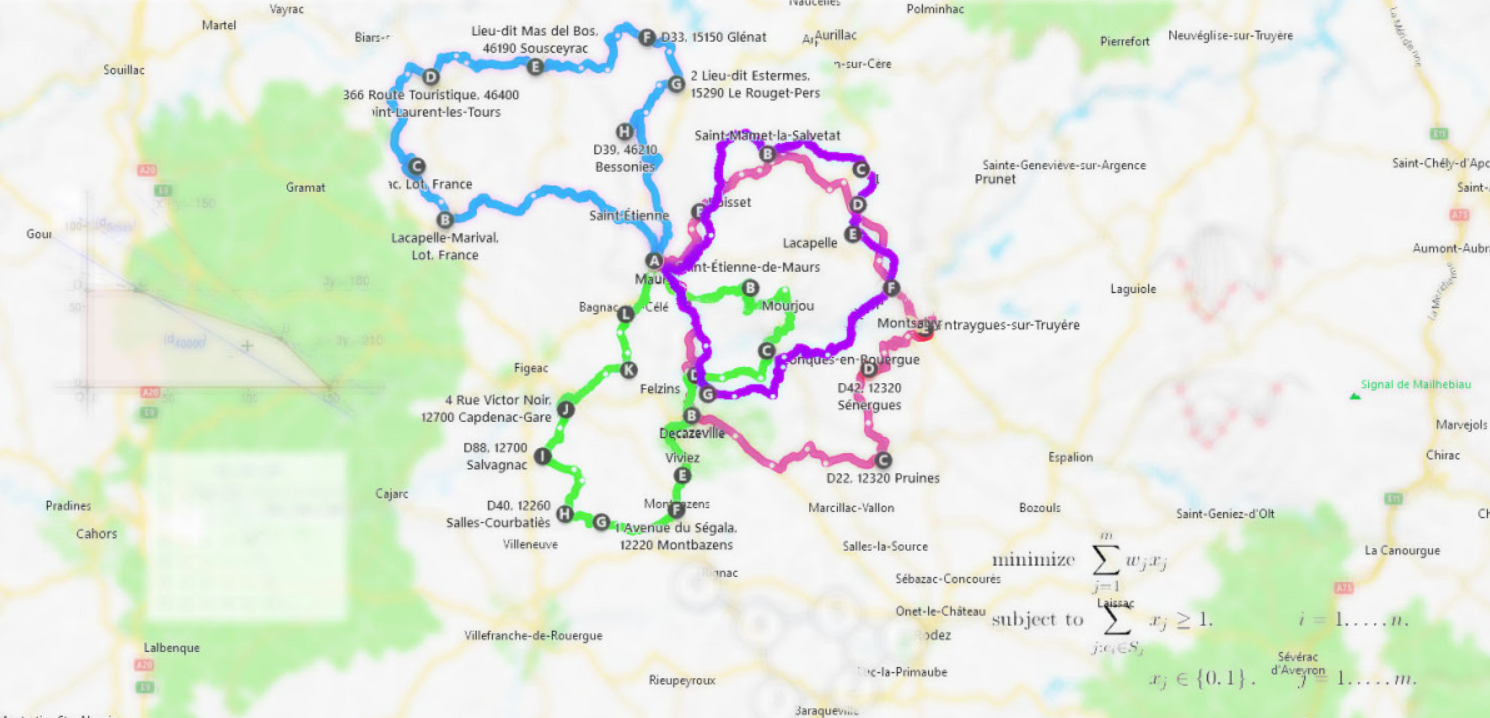



### 1. Introduction

Dans le cadre du projet ADEME sur la mobilit√© durable, nous √©tudions un probl√®me d‚Äôoptimisation de tourn√©es de livraison.  
L‚Äôobjectif est de d√©terminer **l‚Äôordre optimal de visite** des clients afin de **minimiser la distance totale parcourue**, tout en respectant certaines **contraintes logistiques** telles que la capacit√© des v√©hicules ou les demandes de livraison.

Ce probl√®me est une **g√©n√©ralisation du Probl√®me du Voyageur de Commerce (TSP)**, souvent d√©sign√© sous le nom de **Vehicle Routing Problem (VRP)**.

Le pr√©sent livrable a pour but :
- de **formaliser le probl√®me** sous forme math√©matique et algorithmique ;
- d‚Äôen **analyser la complexit√© th√©orique** ;
- et de **poser les bases** pour une future r√©solution via des m√©taheuristiques (dans les livrables suivants).


### 2. Repr√©sentation graphique du probl√®me


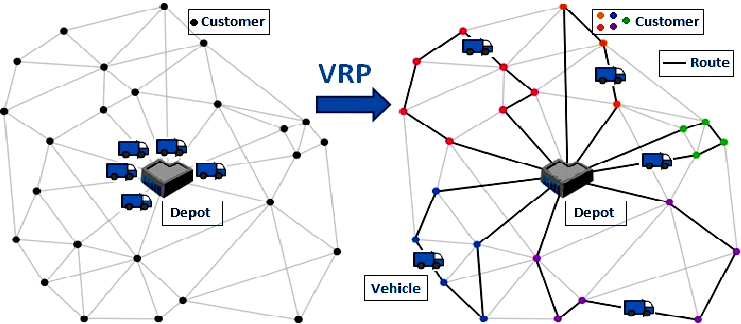

In [10]:
from IPython.display import Image, display
display(Image(filename="images/dd.png", width=650))





  <br/>
  <em>Figure 1 ‚Äì Illustration du probl√®me de routage de v√©hicules (VRP)</em>
</p>

<p style="text-align:justify;">
  Cette figure illustre le <strong>Vehicle Routing Problem (VRP)</strong>.
  Le d√©p√¥t central (<em>Depot</em>) est repr√©sent√© au centre,
  tandis que les points (<em>Customers</em>) repr√©sentent les clients √† livrer.
  Les fl√®ches (<em>Routes</em>) indiquent les trajets r√©alis√©s par diff√©rents v√©hicules,
  chacun optimisant sa tourn√©e. L‚Äôobjectif est de <strong>minimiser la distance totale</strong>
  parcourue tout en respectant les contraintes de capacit√© et, dans le cas du
  <strong>CVRPTW</strong>, les fen√™tres temporelles de service de chaque client.
</p>




### üî∏ Interpr√©tation du graphe

Cette figure illustre la **mod√©lisation graphique** du *Vehicle Routing Problem (VRP)*.  
Le graphe est constitu√© de plusieurs **√©l√©ments visuels** qui traduisent les composantes du probl√®me r√©el :



#### üè† Le d√©p√¥t (Depot)
Situ√© au centre, il repr√©sente le **point de d√©part et de retour** des v√©hicules.  
Tous les trajets partent et reviennent √† ce point.



#### üë• Les clients (Customers)
Ce sont les **points r√©partis autour du d√©p√¥t**.  
Chaque client correspond √† une destination o√π une **livraison** doit √™tre effectu√©e.  
Dans le cas du **CVRPTW**, chaque client poss√®de une **fen√™tre de temps** pendant laquelle il peut √™tre servi, symbolisant une **contrainte horaire**.



#### üîÅ Les ar√™tes (Routes)
Ce sont les **lignes reliant** le d√©p√¥t aux clients ou les clients entre eux.  
Elles repr√©sentent les **trajets possibles** que les v√©hicules peuvent emprunter.  
Les diff√©rentes **couleurs de routes** indiquent les **tourn√©es attribu√©es √† chaque v√©hicule**.



#### üöö Les v√©hicules (Vehicles)
Repr√©sent√©s par les **camions** sur le graphe.  
Chacun effectue une **tourn√©e distincte** reliant un ensemble de clients, puis revient au d√©p√¥t.  
Ces tourn√©es doivent respecter la **capacit√© maximale** de chaque v√©hicule (quantit√© transportable).



#### üé® Les couleurs
Chaque **couleur correspond √† une tourn√©e diff√©rente**.  
Cela permet de visualiser comment le **probl√®me initial** (√† gauche) est d√©compos√© en plusieurs **sous-tourn√©es optimis√©es** (√† droite).



### üîπ Interpr√©tation visuelle globale

Le **graphe de gauche** repr√©sente le r√©seau complet de clients potentiels √† visiter.  
Le **graphe de droite** montre la **solution organis√©e apr√®s optimisation** :  
chaque v√©hicule dessert un groupe de clients selon un trajet d√©fini,  
en **minimisant la distance totale parcourue** et en respectant les **contraintes de capacit√© et de fen√™tres temporelles**.



üß† **En r√©sum√© :**  
Ce graphe met en √©vidence :
- la **structure du probl√®me** (d√©p√¥t, clients, trajets) ;  
- la **r√©partition des tourn√©es** entre v√©hicules ;  
- et la **transition visuelle** d‚Äôun probl√®me global complexe vers plusieurs sous-probl√®mes optimis√©s.  

Il constitue la **repr√©sentation visuelle** du VRP, sur laquelle s‚Äôappuie la **mod√©lisation math√©matique** pr√©sent√©e dans la section suivante.


## 3. Analyse de complexit√© (preuve de NP-compl√©tude)

### 3.1. D√©finition (version d√©cision)  
Pour raisonner sur la complexit√© nous consid√©rons la **version d√©cision** du probl√®me.

**Instance :** un graphe complet pond√©r√© \(G=(V,E)\), un entier \(k\).  
**Question (Decision-VRP / Decision-ITSP) :** existe-t-il une tourn√©e (ou un ensemble de tourn√©es respectant les contraintes choisies) de co√ªt total \(\le k\) qui visite chaque client au moins une fois (et respecte les contraintes impos√©es) ?

Nous allons montrer que cette version d√©cisionnelle est **NP-compl√®te**.

---

### 3.2. Le probl√®me appartient √† NP  
Soit une instance \((G,k)\). Un certificat est une tourn√©e (ou un ensemble de tourn√©es) d√©crite comme une liste ordonn√©e de sommets pour chaque v√©hicule.  
La v√©rification consiste √† :

1. v√©rifier que chaque sommet client appara√Æt au moins une fois dans les tourn√©es (co√ªts \(O(n+m)\)),
2. v√©rifier que les contraintes (capacit√©s, fen√™tres temporelles si pr√©sentes, etc.) sont respect√©es (calcul des charges, des temps d‚Äôarriv√©e ‚Äì tout se fait en temps polynomial),
3. calculer le co√ªt total de la tourn√©e (somme de distances) et v√©rifier \(\le k\).

Chaque √©tape s‚Äôeffectue en temps polynomial par rapport √† la taille de l‚Äôentr√©e. Donc **Decision-VRP \(\in\) NP**.

---

### 3.3. NP-duret√© (r√©duction polynomiale)  
Pour prouver NP-duret√©, on montre une r√©duction polynomiale depuis un probl√®me connu NP-complet. Deux r√©ductions classiques :

#### A) R√©duction directe depuis **Hamiltonian Cycle** (HC) vers **Decision-TSP** (puis vers Decision-VRP)
- **Hamiltonian Cycle (HC)** : instance un graphe non orient√© \(G'=(V',E')\). Question : existe-t-il un cycle passant par chaque sommet exactement une fois ?
- Construisons une instance de **Decision-TSP** (graphe complet pond√©r√©) \(G\) sur les m√™mes sommets \(V'\) :
  - pour chaque paire \((u,v)\) : si \((u,v)\in E'\) alors mettre \(d(u,v)=1\), sinon \(d(u,v)=2\).
  - poser \(k = |V'|\).
- **Claim** : \(G'\) a un cycle Hamiltonien ssi il existe une tourn√©e de co√ªt \(\le k\) dans \(G\).
  - Si \(G'\) a un cycle Hamiltonien, ce cycle utilise uniquement des ar√™tes de \(E'\), donc co√ªt \(=|V'| \le k\).
  - Inversement, si une tourn√©e de co√ªt \(\le k\) existe, elle doit n‚Äôutiliser que des ar√™tes de co√ªt 1 (car toute ar√™te de co√ªt 2 augmente le co√ªt au-dessus de \(k\)), donc ces ar√™tes appartiennent toutes √† \(E'\) et forment un cycle Hamiltonien.
- Cette transformation est r√©alis√©e en temps polynomial. Ainsi **HC \(\le_p\) Decision-TSP**, donc Decision-TSP est NP-hard.

#### B) R√©duction Decision-TSP ‚Üí Decision-VRP
- La **Decision-VRP** g√©n√©ralise Decision-TSP : prendre une seule voiture (k = 1), capacit√©s suffisantes (ou ignor√©es) et m√™mes distances.  
- Construire l‚Äôinstance VRP en posant \(k=1\) et en transf√©rant la matrice de distances. Une solution VRP optimale avec un seul v√©hicule correspond exactement √† la solution TSP.  
- Donc **Decision-TSP \(\le_p\) Decision-VRP**.

Combinant A) et B) on obtient une r√©duction polynomiale **HC ‚Üí TSP ‚Üí VRP**, donc **Decision-VRP est NP-hard**.

---




### Exemple illustratif : R√©duction de Hamiltonian Cycle vers TSP

Dans la preuve de NP-compl√©tude, on transforme une instance du **Hamiltonian Cycle (HC)** en instance du **Travelling Salesman Problem (TSP)**.

- Si deux sommets sont reli√©s dans le graphe HC ‚Üí distance = 1  
- Sinon ‚Üí distance = 2  
- Le seuil \( k = |V| \)

Une tourn√©e de co√ªt ‚â§ k existe **ssi** il existe un cycle Hamiltonien dans le graphe original.

Le code ci-dessous illustre cette r√©duction et affiche les deux graphes :
- √† gauche, le graphe HC non pond√©r√©,
- √† droite, le graphe TSP pond√©r√© √©quivalent.


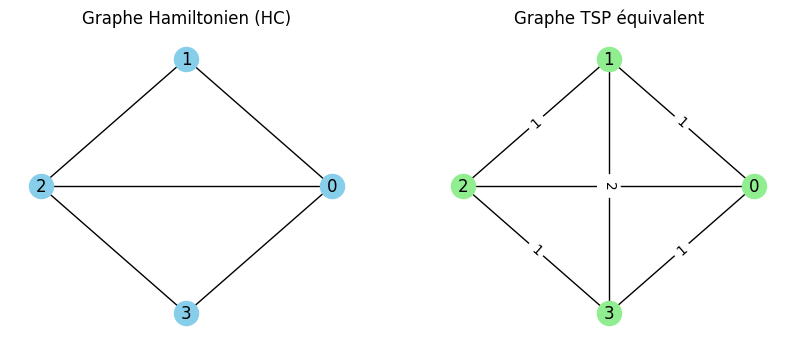

Nombre de sommets : 4
Seuil k = 4

Si le graphe HC poss√®de un cycle Hamiltonien,
alors il existe une tourn√©e dans G_TSP de co√ªt ‚â§ k (toutes les ar√™tes de poids 1).
Sinon, toute tourn√©e aura au moins une ar√™te de poids 2, donc co√ªt > k.
=> La r√©duction est correcte.



In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# ===============================
# R√©duction de Hamiltonian Cycle (HC) vers TSP
# ===============================

# 1Ô∏è‚É£ Graphe d'entr√©e pour le probl√®me Hamiltonien (HC)
# Un graphe simple o√π on cherche un cycle passant par tous les sommets
G_HC = nx.Graph()
G_HC.add_edges_from([
    (0, 1), (1, 2), (2, 3), (3, 0),  # Cycle Hamiltonien existe (0-1-2-3-0)
    (0, 2)  # Une ar√™te en plus (optionnelle)
])

# 2Ô∏è‚É£ Construction du graphe TSP √©quivalent
# Pour chaque paire (u, v), on met :
#   - poids = 1 si (u, v) ‚àà E_HC
#   - poids = 2 sinon
G_TSP = nx.complete_graph(G_HC.nodes())
for (u, v) in G_TSP.edges():
    if G_HC.has_edge(u, v):
        G_TSP[u][v]['weight'] = 1
    else:
        G_TSP[u][v]['weight'] = 2

# 3Ô∏è‚É£ Affichage comparatif
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

pos = nx.circular_layout(G_HC)

# Graphe HC
nx.draw(G_HC, pos, with_labels=True, node_color='skyblue', ax=axs[0])
axs[0].set_title("Graphe Hamiltonien (HC)")
# Graphe TSP pond√©r√©
nx.draw(G_TSP, pos, with_labels=True, node_color='lightgreen', ax=axs[1])
labels = nx.get_edge_attributes(G_TSP, 'weight')
nx.draw_networkx_edge_labels(G_TSP, pos, edge_labels=labels, ax=axs[1])
axs[1].set_title("Graphe TSP √©quivalent")

plt.show()

# 4Ô∏è‚É£ V√©rification : co√ªt cible
n = len(G_TSP.nodes())
k = n  # co√ªt maximum autoris√© (si toutes les ar√™tes valent 1)
print(f"Nombre de sommets : {n}")
print(f"Seuil k = {k}")

# 5Ô∏è‚É£ Explication
print("""
Si le graphe HC poss√®de un cycle Hamiltonien,
alors il existe une tourn√©e dans G_TSP de co√ªt ‚â§ k (toutes les ar√™tes de poids 1).
Sinon, toute tourn√©e aura au moins une ar√™te de poids 2, donc co√ªt > k.
=> La r√©duction est correcte.
""")


### R√©duction de TSP vers VRP

Pour prouver que le **Vehicle Routing Problem (VRP)** est NP-difficile,  
on peut montrer comment transformer une instance du **Travelling Salesman Problem (TSP)** en une instance √©quivalente du VRP.

#### Principe de la r√©duction :
- On part d‚Äôune instance TSP : un ensemble de villes et une matrice de distances.
- On ajoute un **d√©p√¥t (depot)** qui sera le point de d√©part et d‚Äôarriv√©e du camion.
- On consid√®re **un seul v√©hicule (k = 1)**.
- On donne une **capacit√© infinie** au v√©hicule (ou suffisante pour tout livrer).
- Chaque client repr√©sente une ‚Äúlivraison‚Äù de demande 1.

Alors :
- Une solution du TSP correspond exactement √† une tourn√©e valide du VRP (avec 1 camion).
- Le co√ªt total est identique.

Ainsi, r√©soudre le VRP pour un seul v√©hicule revient √† r√©soudre le TSP.
Cela montre que le **VRP est NP-difficile**.


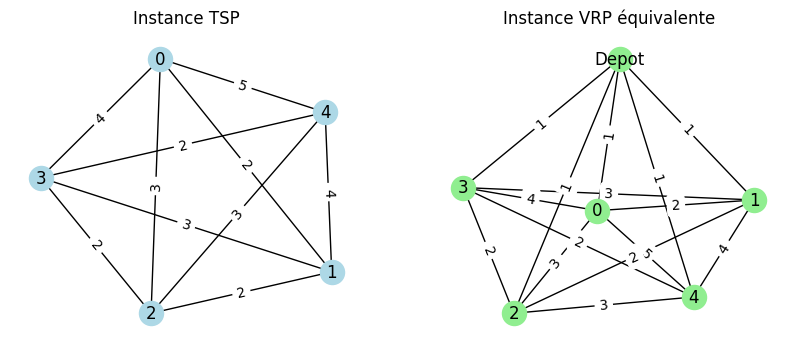

Nombre de villes TSP : 5
Nombre de n≈ìuds VRP (avec d√©p√¥t) : 6

‚úÖ Une tourn√©e optimale du VRP avec 1 seul camion et capacit√© illimit√©e
   correspond exactement √† une tourn√©e optimale du TSP.
=> Le VRP est au moins aussi difficile que le TSP (donc NP-difficile).



In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# ===============================
# R√©duction de TSP vers VRP
# ===============================

# 1Ô∏è‚É£ Instance du TSP : un graphe complet avec co√ªts
G_TSP = nx.complete_graph(5)  # 5 villes
for (u, v) in G_TSP.edges():
    if u != v:
        G_TSP[u][v]['weight'] = abs(u - v) + 1  # poids simple pour exemple

# 2Ô∏è‚É£ Transformation : ajout du d√©p√¥t pour le VRP
G_VRP = nx.Graph()
depot = "Depot"

# On garde toutes les ar√™tes TSP
for (u, v, data) in G_TSP.edges(data=True):
    G_VRP.add_edge(u, v, weight=data["weight"])

# Ajout du d√©p√¥t reli√© √† toutes les villes
for city in G_TSP.nodes():
    G_VRP.add_edge(depot, city, weight=1)

# 3Ô∏è‚É£ Visualisation
pos_tsp = nx.spring_layout(G_TSP, seed=42)
pos_vrp = nx.spring_layout(G_VRP, seed=42)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Graphe TSP
nx.draw(G_TSP, pos_tsp, with_labels=True, node_color='lightblue', ax=axs[0])
labels_tsp = nx.get_edge_attributes(G_TSP, 'weight')
nx.draw_networkx_edge_labels(G_TSP, pos_tsp, edge_labels=labels_tsp, ax=axs[0])
axs[0].set_title("Instance TSP")

# Graphe VRP
nx.draw(G_VRP, pos_vrp, with_labels=True, node_color='lightgreen', ax=axs[1])
labels_vrp = nx.get_edge_attributes(G_VRP, 'weight')
nx.draw_networkx_edge_labels(G_VRP, pos_vrp, edge_labels=labels_vrp, ax=axs[1])
axs[1].set_title("Instance VRP √©quivalente")

plt.show()

# 4Ô∏è‚É£ V√©rification
print(f"Nombre de villes TSP : {len(G_TSP.nodes())}")
print(f"Nombre de n≈ìuds VRP (avec d√©p√¥t) : {len(G_VRP.nodes())}")
print("""
‚úÖ Une tourn√©e optimale du VRP avec 1 seul camion et capacit√© illimit√©e
   correspond exactement √† une tourn√©e optimale du TSP.
=> Le VRP est au moins aussi difficile que le TSP (donc NP-difficile).
""")


### Conclusion de la cha√Æne de r√©duction

Nous avons illustr√© la cha√Æne logique suivante :

\[
HC \leq_p TSP \leq_p VRP
\]

- Le **Hamiltonian Cycle (HC)** est NP-complet.
- Le **Travelling Salesman Problem (TSP)** est une g√©n√©ralisation pond√©r√©e de HC ‚Üí donc NP-difficile.
- Le **Vehicle Routing Problem (VRP)** g√©n√©ralise le TSP (plusieurs v√©hicules, capacit√©s, contraintes de temps, etc.) ‚Üí donc √©galement NP-difficile.

Ainsi, le probl√®me de planification de tourn√©es dans notre projet (VRP avec contraintes)
h√©rite naturellement de cette complexit√©.
C‚Äôest pourquoi nous devons utiliser des **m√©taheuristiques** (comme le recuit simul√©, la recherche tabou, ou les algorithmes g√©n√©tiques)
pour obtenir des solutions approch√©es efficaces.


### 3.4. Conclusion
La version d√©cisionnelle de notre probl√®me appartient √† NP et est NP-hard par r√©duction polynomiale depuis Hamiltonian Cycle.  
Par cons√©quent **Decision-VRP est NP-complet**.

Remarque : l‚Äôajout de contraintes (fen√™tres temporelles, flotte h√©t√©rog√®ne, trafic dynamique) conserve au minimum la difficult√© NP-hard (les variantes sont en g√©n√©ral aussi NP-hard, parfois plus difficiles), car on peut toujours encoder une instance de TSP/Hamiltonian dans une instance restreinte du VRP.

### 3.5. Cas du **CVRPTW** : extension du **VRP** classique

Le **CVRPTW** (*Capacitated Vehicle Routing Problem with Time Windows*) est une **extension directe** du **VRP** classique.  
Il introduit deux ensembles suppl√©mentaires de contraintes :

1. **Contraintes de capacit√©**  
   Chaque v√©hicule poss√®de une capacit√© maximale $Q$.  
   La somme des demandes des clients visit√©s sur une tourn√©e ne doit pas d√©passer cette capacit√© :  
   $$
   \sum_{i \in \text{tourn√©e}_v} q_i \le Q
   $$
   o√π $q_i$ est la demande du client $i$.

2. **Fen√™tres temporelles (Time Windows)**  
   Chaque client $i$ doit √™tre servi dans un intervalle de temps $[a_i, b_i]$.  
   Cela impose des contraintes sur l‚Äôordre et le moment des visites :  
   $$
   a_i \le t_i \le b_i
   $$
   o√π $t_i$ repr√©sente le temps d‚Äôarriv√©e du v√©hicule chez le client $i$.

---

### Preuve de la complexit√© du **CVRPTW**

- Le **VRP** est d√©j√† **NP-complet**, comme d√©montr√© pr√©c√©demment (par r√©duction depuis le **TSP** et le **Hamiltonian Cycle**).  
- Le **CVRPTW** g√©n√©ralise le VRP :  
  - Si l‚Äôon supprime les fen√™tres temporelles et que les capacit√©s sont consid√©r√©es comme infinies, le **CVRPTW** se r√©duit exactement √† un **VRP**.  
  - Ainsi, toute instance du VRP est un **cas particulier** du CVRPTW.

Par cons√©quent, comme le **VRP** est NP-complet et que le **CVRPTW** englobe le VRP, on a :  
$$
\text{VRP} \le_p \text{CVRPTW}
$$

Ce qui implique que le **CVRPTW** est au moins aussi difficile que le VRP, donc **NP-difficile**.  
Et comme la v√©rification d‚Äôune solution reste polynomiale (m√™mes arguments que pr√©c√©demment) :  
$$
\text{CVRPTW} \in \text{NP}
$$

Ainsi, le **CVRPTW** est **NP-complet**.

---

### Interpr√©tation

Ce r√©sultat signifie que :

- Aucune m√©thode exacte ne peut garantir une solution optimale en temps polynomial (sauf si $P = NP$).  
- En pratique, on utilise donc des **m√©taheuristiques** (*recherche tabou*, *algorithmes g√©n√©tiques*, *recuit simul√©*, etc.) pour obtenir des solutions approch√©es efficaces.

---

### ‚úÖ R√©sum√© global de la preuve de NP-compl√©tude

$$
\text{HC} \le_p \text{TSP} \le_p \text{VRP} \le_p \text{CVRPTW}
$$

Tous ces probl√®mes appartiennent √† $\text{NP}$,  
et le **CVRPTW** h√©rite directement de la **NP-compl√©tude** du **VRP**.


### 4. Mod√©lisation math√©matique (VRP - formulation utilis√©e)

Soit un graphe complet pond√©r√© $G = (V, E)$ o√π :

- $V = \{0, 1, \dots, n\}$ : $0$ = d√©p√¥t, $1 \ldots n$ = clients.
- $d_{ij}$ : distance (ou co√ªt) entre $i$ et $j$.
- $q_i$ : demande du client $i$ (avec $q_0 = 0$).
- $C$ : capacit√© maximale d'un v√©hicule.
- $K$ : nombre de v√©hicules disponibles (param√®tre).

**Variables de d√©cision**
- $x_{ij} \in \{0, 1\}$ vaut 1 si on emprunte l'arc $i \to j$, 0 sinon.
- $u_i$ (continue) : variable auxiliaire MTZ repr√©sentant la charge cumul√©e embarqu√©e apr√®s la visite de $i$ (pour $i \neq 0$).

**Fonction objectif**

$$
\min Z = \sum_{i \in V} \sum_{\substack{j \in V \\ j \neq i}} d_{ij} \, x_{ij}
$$


### **Contraintes**

1. **Chaque client est visit√© exactement une fois (sortie / entr√©e)**  
$$
\sum_{\substack{j \in V \\ j \neq i}} x_{ij} = 1, \quad \forall i \in V \setminus \{0\}
$$
$$
\sum_{\substack{i \in V \\ i \neq j}} x_{ij} = 1, \quad \forall j \in V \setminus \{0\}
$$

2. **D√©parts et retours au d√©p√¥t (K tourn√©es)**  
$$
\sum_{\substack{j \in V \\ j \neq 0}} x_{0j} = K, \qquad
\sum_{\substack{i \in V \\ i \neq 0}} x_{i0} = K
$$

3. **MTZ (√©limination des sous-tours + capacit√©)**  
$$
q_i \leq u_i \leq C, \quad \forall i \in V \setminus \{0\}
$$
$$
u_i - u_j + C x_{ij} \leq C - q_j, \quad \forall i \neq j, \; i, j \in V \setminus \{0\}
$$
Ces contraintes lient l'ordre de visite √† la capacit√© et suppriment les sous-tours.

4. **Domaine**  
$$
x_{ij} \in \{0, 1\}, \quad u_i \in \mathbb{R}_{+}
$$

---

**Remarques**
- Si tu veux laisser le solveur d√©cider du nombre de v√©hicules, remplace les √©galit√©s du point 2 par des \( \leq K \) ou \( \leq 1 \) selon le cas.  
- La formulation **MTZ** fonctionne bien pour des instances de taille petite √† moyenne. Pour des probl√®mes plus grands (plusieurs centaines de clients), il est pr√©f√©rable d'utiliser une formulation par flot ou une m√©thode heuristique.

### 4.1 Version de base (rappel)

**But.** Relier un ensemble de clients `N` depuis/vers un d√©p√¥t `0` en minimisant le **co√ªt total** (distance/temps total).

**Hypoth√®ses de base.**
- Graphe dirig√© $G=(V,A)$, $V=\{0\}\cup N$, co√ªts/temps $\tau_{ij}\ge 0$, temps de service $s_i\ge 0$.
- Chaque client est visit√© une et une seule fois par un unique v√©hicule.
- Conservation des flux : si un v√©hicule entre chez un client, il en sort.
- D√©part/retour au d√©p√¥t.

> Cette base est √©tendue ci-dessous avec **capacit√©s**, **flotte multi-camions** et **fen√™tres temporelles** (attente autoris√©e).


### 4.2 Contraintes retenues & p√©rim√®tre

Nous ajoutons au VRP de base :

1. **Capacit√© des camions** : chaque camion a une capacit√© $Q$ (poids ou volume transportable).  
2. **Flotte multi-camions** : $k$ camions **identiques** disponibles en parall√®le (certains peuvent rester inutilis√©s).  
3. **Fen√™tres temporelles (VRPTW)** : chaque client $i$ a un cr√©neau $[a_i, b_i]$ ; **attente autoris√©e** si arriv√©e avant $a_i$.

**Objectif maintenu :** minimiser le **co√ªt total**  
$$
\sum_{k\in K}\sum_{(i,j)\in A} \tau_{ij}\,x_{ijk}
$$  
(plus facile √† valider sur les benchmarks VRPLIB qu‚Äôun makespan).


### 4.3 Notations (extensions)

**Ensembles**
- $K = \{1, \dots, k\}$ : camions  
- $N$ : clients  
- $V = \{0\} \cup N$ : ensemble des sommets ($0$ = d√©p√¥t)  
- $A = \{(i,j) \in V^2 : i \neq j\}$ : arcs orient√©s possibles  

**Param√®tres**
- $q_i \ge 0$ : demande du client $i$  
- $Q > 0$ : capacit√© (identique) d‚Äôun camion  
- $\tau_{ij} \ge 0$ : temps (ou distance) sur l‚Äôarc $(i,j)$  
- $s_i \ge 0$ : temps de service au sommet $i$  
- $[a_i, b_i]$ : fen√™tre temporelle du client $i$  
- $M$ : grande constante (borne sup√©rieure sur les temps, utilis√©e dans les contraintes de temps)  

**Variables de d√©cision**
- $x_{ijk} \in \{0,1\}$ : le camion $k$ emprunte l‚Äôarc $(i,j)$  
- $t_i \ge 0$ : **d√©but de service** au client $i$ (chaque client est servi une seule fois)  
- $u_i \ge 0$ : **charge du v√©hicule** juste apr√®s le service au sommet $i$ (formulation MTZ-capacit√©, 1D)


### 4.4 Mod√®le √©tendu (VRPTW-Cap, multi-camions)

**Objectif(minimiser le co√ªt total de toutes les tourn√©es effectu√©es par l‚Äôensemble des camions)**

$$
\min \sum_{k\in K}\sum_{(i,j)\in A} \tau_{ij}\, x_{ijk}
$$

---

**1) Visite unique de chaque client**

$$
\sum_{k\in K}\sum_{j\in V\setminus\{i\}} x_{ijk} = 1, \quad
\sum_{k\in K}\sum_{j\in V\setminus\{i\}} x_{jik} = 1,
\quad \forall i\in N
$$

---

**2) Continuit√© des tourn√©es par v√©hicule (ariver et quiter le stop chez le client)**

$$
\sum_{j\in V\setminus\{i\}} x_{ijk} - 
\sum_{j\in V\setminus\{i\}} x_{jik} = 0,
\quad \forall i\in N,\ \forall k\in K
$$

---

**3) D√©p√¥t **

$$
\sum_{j\in N} x_{0jk} \le 1, \qquad
\sum_{i\in N} x_{i0k} \le 1, \quad \forall k\in K
$$

*(mettre $=1$ si tu imposes d‚Äôutiliser tous les camions)*

---

**4) Capacit√© (formulation MTZ-capacit√©, 1D)**

$$
u_{0} = 0, \qquad q_i \le u_i \le Q, \quad \forall i\in N
$$

$$
u_j \ge u_i + q_j - Q\left(1 - \sum_{k\in K} x_{ijk}\right),
\quad \forall i\in V, \forall j\in N, i\neq j
$$

*(si $(i,j)$ est utilis√© par un camion, la charge progresse de $q_j$ et reste $\le Q$)*

---

**5) Fen√™tres temporelles + attente autoris√©e**

$$
a_i \le t_i \le b_i, \quad \forall i\in N
$$

$$
t_0 = 0
$$

$$
t_j \ge t_i + s_i + \tau_{ij} - M(1 - x_{ijk}),
\quad \forall k\in K, \forall (i,j)\in A
$$

*(si le v√©hicule arrive avant $a_i$, il attend implicitement jusqu‚Äô√† l‚Äôouverture de la fen√™tre)*




## 5. Contraintes retenues et justification

### 5.1 Capacit√©
Chaque camion transporte un volume maximal Q (cas e-commerce).  
‚Üí Permet de mod√©liser le remplissage des v√©hicules.

### 5.2 Fen√™tres temporelles
Chaque client a un cr√©neau horaire [a_i, b_i].  
‚Üí Refl√®te la r√©alit√© des livraisons √† domicile (attente possible si arriv√©e avant).

### 5.3 Flotte multi-v√©hicules
V√©hicules identiques, disponibles en parall√®le.  
‚Üí Repr√©sente un d√©p√¥t central avec plusieurs tourn√©es.

### 5.4 Contraintes non retenues
- Pas de contraintes de priorit√©s entre clients.  
- Pas de contraintes environnementales (pour simplifier la premi√®re version).



## 4. R√©f√©rences bibliographiques

- Dantzig, G. B., & Ramser, J. H. (1959). *The Truck Dispatching Problem.*
- Toth, P., & Vigo, D. (2014). *Vehicle Routing: Problems, Methods, and Applications.*
- VRPLIB : https://vrplib.readthedocs.io
